In [1]:
# Show trade off of transmissibility and escape depending on fraction with immunity and susceptibility
# Need to be clear about which is winning

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append( '../relative_fitness_mechanisms/' )
import plot_utils

In [4]:
FIG_PATH = "../notebooks/figures/"

In [5]:
WT_COLOR, VART_COLOR, VARE_COLOR = "green", "purple", "orange"
WT_LABEL, VART_LABEL, VARE_LABEL = "Wildtype", "Transmissibility variant", "Escape variant"
COLOR_MAP = {WT_LABEL: WT_COLOR, VART_LABEL: VART_COLOR, VARE_LABEL: VARE_COLOR}

In [6]:
# Getting base parameters
R0 = 2.8
gamma = 1 / 3.2
beta = R0 * gamma

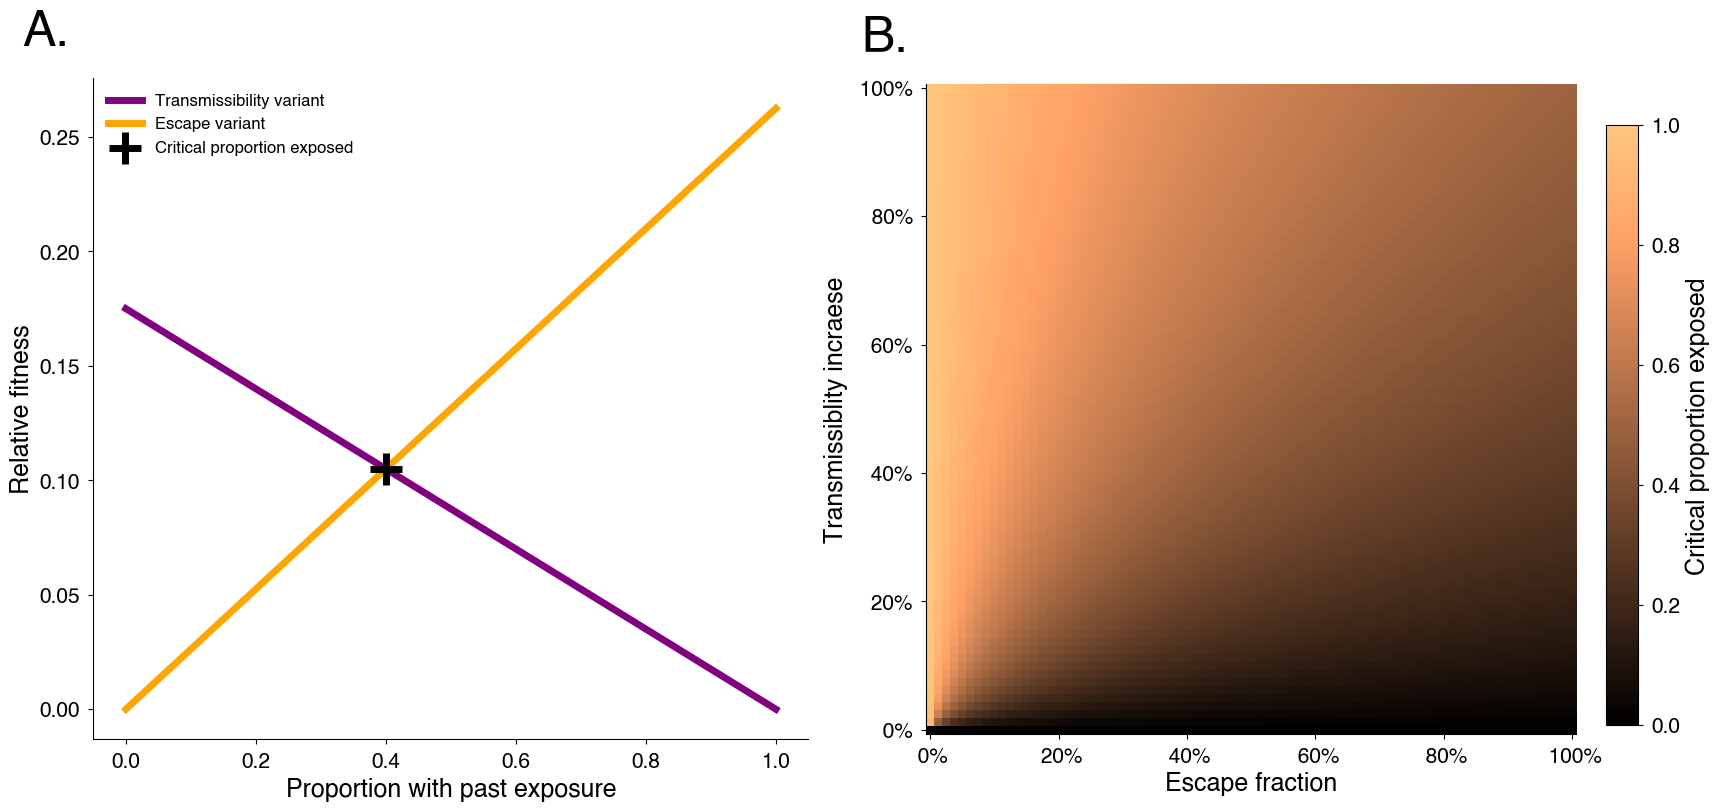

In [13]:
# Set up axes
fig = plt.figure(figsize=(16., 8.), constrained_layout=True)
spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[1.1, 1.0])

# A. Proportion vaccinated on x-axis, relative fitness at y.
# Show when immune escape is preferred

### Panel A parameters
eta_E = 0.3
eta_T = 1.2
prop_exposed = np.linspace(0,1,31)
###

ax = fig.add_subplot(spec[0])
var_t_lambda = (eta_T - 1) * beta * (1 - prop_exposed)
var_e_lambda = eta_E * beta * prop_exposed
ax.plot(prop_exposed, var_t_lambda, color = VART_COLOR, label = VART_LABEL)
ax.plot(prop_exposed, var_e_lambda, color = VARE_COLOR, label = VARE_LABEL)
ax.set_xlabel("Proportion with past exposure")
ax.set_ylabel("Relative fitness")

# Highlight point of intersection
def critical_proportion(eta_T, eta_E):
    return (eta_T - 1) / (eta_E + eta_T-1)

crit_prop = critical_proportion(eta_T, eta_E)
crit_relfit = eta_E * beta * crit_prop
ax.scatter(crit_prop, crit_relfit , s=500, color="k", marker="+", zorder=3, label="Critical proportion exposed")
ax.legend(frameon=False)

ax_panel_a = ax

# B. Point of vaccination where escape preferred various eta_E and eta_T
ax = fig.add_subplot(spec[1])

eta_T = np.linspace(2.00, 1.0, 81)
eta_E = np.linspace(0.001, 0.996, 81)

eta_Emg, eta_Tmg = np.meshgrid(eta_E, eta_T)

crit_props = critical_proportion(eta_Tmg, eta_Emg)

im = ax.imshow(crit_props, vmin=0, vmax=1, cmap="copper")
cbar_ax = fig.add_axes([1.0, 0.1, 0.02, 0.75])
fig.colorbar(im, cbar_ax, label = "Critical proportion exposed")
yticks = [*range(len(eta_T))][::16]
xticks = [*range(len(eta_E))][::16]

ax.set_xticks(xticks)
ax.set_yticks(yticks)

ax.set_xticklabels([f"{eta_E[v]: .2f}" for v in xticks])
ax.set_yticklabels([f"{eta_T[v]: .2f}" for v in yticks])

ax.set_xticklabels([f"{eta_E[v]: .0%}" for v in xticks])
ax.set_yticklabels([f"{(eta_T[v] -1): .0%}" for v in yticks])

ax.set_ylabel("Transmissiblity incraese")
ax.set_xlabel("Escape fraction")
ax_panel_b = ax


# Add panel labels
import string
axes = [ax_panel_a, ax_panel_b]
ax_labels = string.ascii_uppercase 

for ax, ax_label in zip(axes, ax_labels):
    ax.text(-0.1, 1.05, ax_label + ".", transform=ax.transAxes, size=36, weight='bold')

fig_te_tradeoff = fig
fig_te_tradeoff.savefig(FIG_PATH + "transmission_tradeoff.png", bbox_inches='tight')